In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import copy
import seaborn as sns
sns.set(color_codes=True)

In [3]:
data=pd.read_csv(r"C:\Users\sabas\Downloads\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
sns.distplot(data["Age"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

C:\Users\sabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


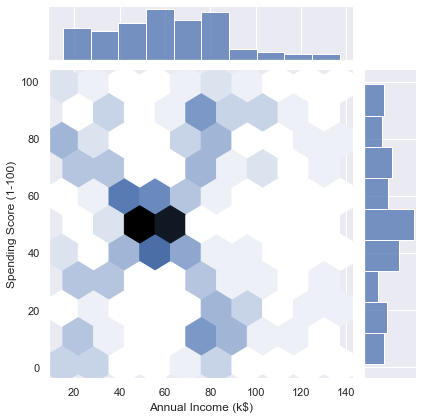

In [6]:
sns.jointplot(data["Annual Income (k$)"],data["Spending Score (1-100)"],kind="hex")

C:\Users\sabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

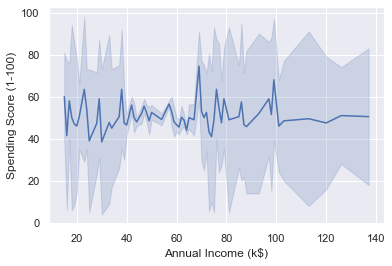

In [10]:
sns.lineplot(data["Annual Income (k$)"],data["Spending Score (1-100)"])

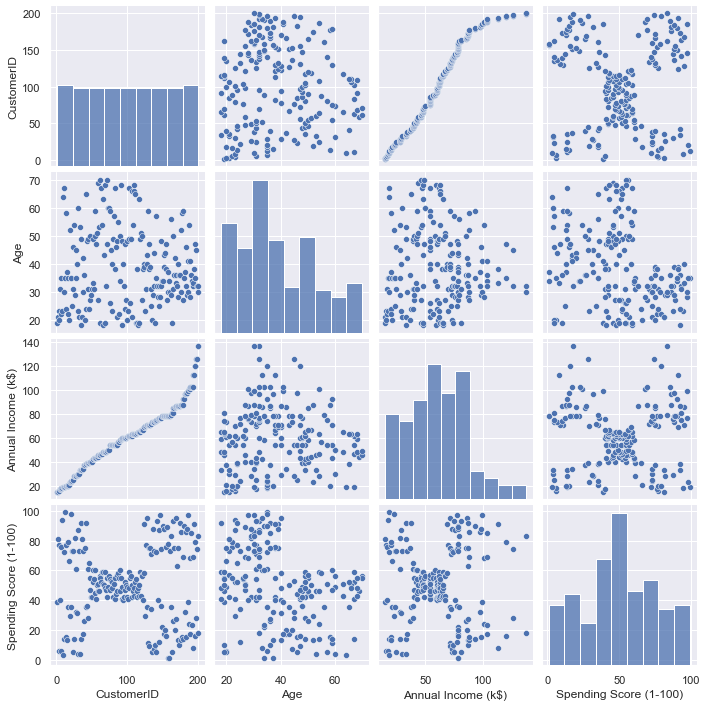

In [11]:
df=data.dropna()
sns.pairplot(df)


In [12]:
data.mean()

C:\Users\sabas\AppData\Local\Temp\ipykernel_14348\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [13]:
data.median()

C:\Users\sabas\AppData\Local\Temp\ipykernel_14348\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [14]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [15]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\sabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

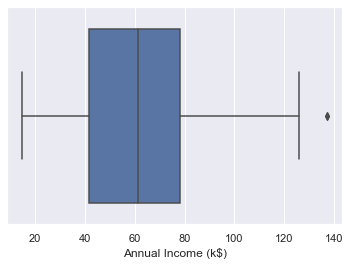

In [17]:
sns.boxplot(data['Annual Income (k$)'])

In [18]:
median = data.loc[data['Annual Income (k$)']<130, 'Annual Income (k$)'].median()
data.loc[data['Annual Income (k$)'] > 130, 'Annual Income (k$)'] = np.nan
data.fillna(median,inplace=True)

C:\Users\sabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

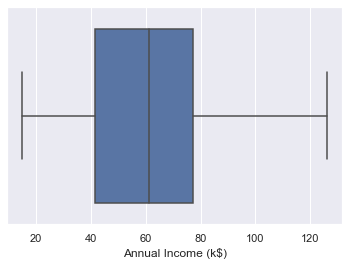

In [19]:
sns.boxplot(data['Annual Income (k$)'])

In [20]:
label=preprocessing.LabelEncoder()
data['Gender']=label.fit_transform(data['Gender'])
data['Gender'].unique()
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40
5,6,0,22,17.0,76
6,7,0,35,18.0,6
7,8,0,23,18.0,94
8,9,1,64,19.0,3
9,10,0,30,19.0,72


In [21]:
scale = StandardScaler()
data_scaled = scale.fit_transform(data)
data_scaled

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.78859775, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.78859775,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.74867369, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.74867369,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.70874963, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.70874963,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.66882558, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.66882558,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.62890152, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.62890152,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.62890152, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.62890152,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.58897746, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [22]:
data.shape, data_scaled.shape

((200, 5), (200, 5))

C:\Users\sabas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss_list')

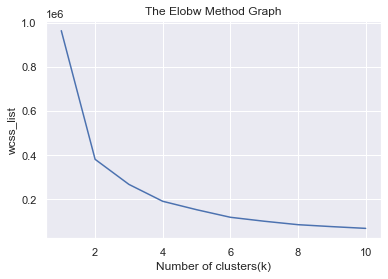

In [23]:
from sklearn.cluster import KMeans  
wcss_list= [] 
x = data
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++')  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')

In [24]:
pca = PCA(2)
data = pca.fit_transform(x)
data.shape

(200, 2)

In [25]:
kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(data)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


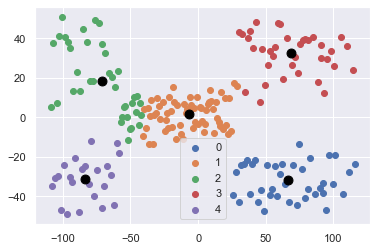

In [26]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()